In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import simpy
from matplotlib import colors

In [18]:
%load_ext autoreload
%autoreload 2

from QueueClass import QueueClass
from sources.ConstantSource import ConstantSource
from sources.PoissonSource import PoissonSource
from sources.BurstySource import BurstySource

import Globals

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
df_responseTimes = pd.DataFrame(columns=['sourceId', 'time', 'responseTime'])
df_blockRespTimes = pd.DataFrame(
    columns=['sourceId', 'time', 'responseTime', 'epsilon_T'])

np.random.seed(10)

In [20]:
def plotResult(sourceId):
    plt.plot(
        df_responseTimes[df_responseTimes.sourceId == sourceId].time,
        df_responseTimes[df_responseTimes.sourceId == sourceId].responseTime,
        linewidth=1.0, label="source " + str(sourceId))

    # Plot the CI of the block averages
    avg_response_time = df_blockRespTimes[df_blockRespTimes.sourceId ==
                                      sourceId].responseTime
    ci = df_blockRespTimes[df_blockRespTimes.sourceId ==
                           sourceId].epsilon_T / 2

    plt.plot(df_blockRespTimes[df_blockRespTimes.sourceId ==
             sourceId].time, avg_response_time + ci, 'r--', linewidth=0.5)
    plt.plot(df_blockRespTimes[df_blockRespTimes.sourceId ==
             sourceId].time, avg_response_time - ci, 'r--', linewidth=0.5)

    plt.grid(True, which="both", ls="dotted")
    # plt.ylim(ymin=0)
    plt.ylabel("Response time")
    plt.xlabel("Time units")
    plt.title("Response time of sources")
    plt.legend()
    # plt.savefig("respTime.png")
    plt.show()

In [ ]:
# %pip install tqdm
# %pip install --upgrade jupyter ipywidgets
# %jupyter nbextension enable --py widgetsnbextension # removed !pip on the recommendation of a comment.


from tqdm.notebook import tqdm


def progress_bar(env, duration):
    with tqdm(total=duration) as pbar:
        while env.now < duration:
            pbar.update(env.now - pbar.n)
            yield env.timeout(10)

In [27]:
env = simpy.Environment()

SCALE = 10**6
simulationDuration = 10**3/2

Globals.periodPrintLR = 10**3
Globals.blockSize = 10**1

q = QueueClass(env, serviceRate=100*SCALE)

# Remove the sources from the dataframes
Globals.df_responseTimes = df_responseTimes[~df_responseTimes.sourceId.isin([
    1, 2, 3])].copy()
Globals.df_blockRespTimes = df_blockRespTimes[~df_blockRespTimes.sourceId.isin([
    1, 2, 3])].copy()
Globals.sources = {}


df_responseTimes = Globals.df_responseTimes
df_blockRespTimes = Globals.df_blockRespTimes

dataSource = PoissonSource(env, q, ident=1, transmissionRate=30*SCALE)
Globals.sources[dataSource.ident] = dataSource

voiceSource = ConstantSource(
    env, q, ident=2, transmissionRate=20*SCALE, packetSize=800)
Globals.sources[voiceSource.ident] = voiceSource

videoSource = BurstySource(env, q, ident=3, transmissionRate=30*SCALE,
                           packetSize=8000, avgPeriodOn=10**-3, burstiness=10)
Globals.sources[videoSource.ident] = videoSource


env.process(progress_bar(env, simulationDuration))
env.run(until=simulationDuration)

  0%|          | 0/500.0 [00:00<?, ?it/s]

KeyboardInterrupt: 

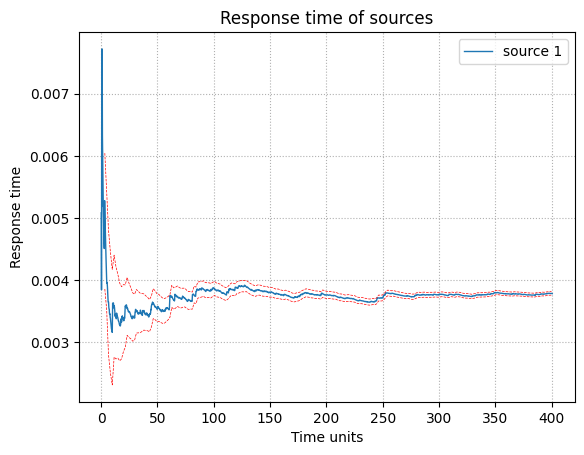

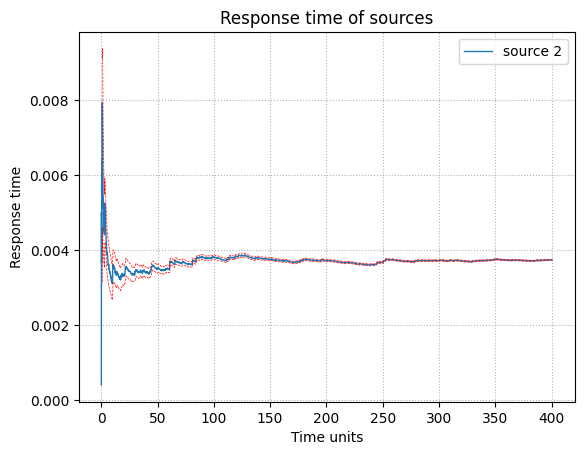

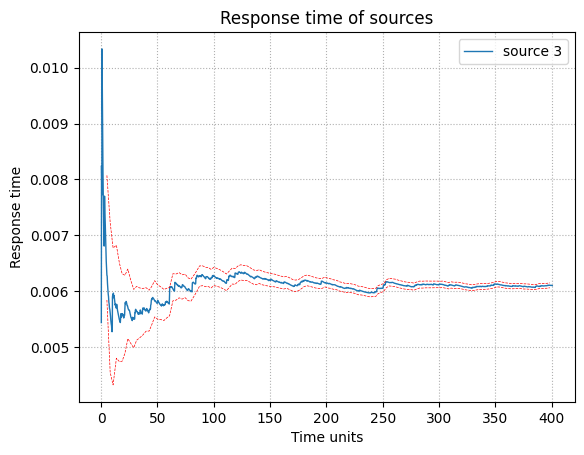

In [28]:
plotResult(1)
plotResult(2)
plotResult(3)

Burstiness = 2

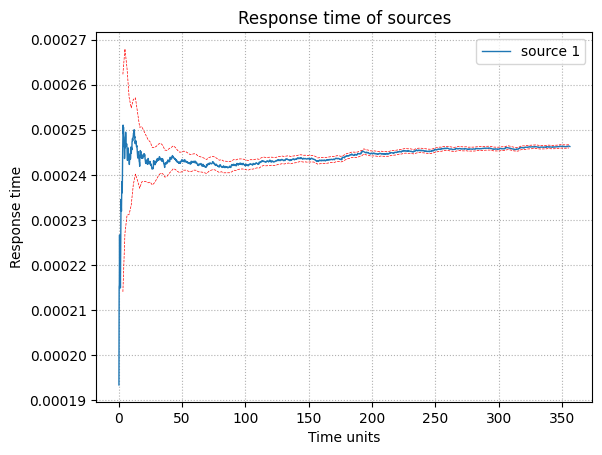

In [23]:
plotResult(1)

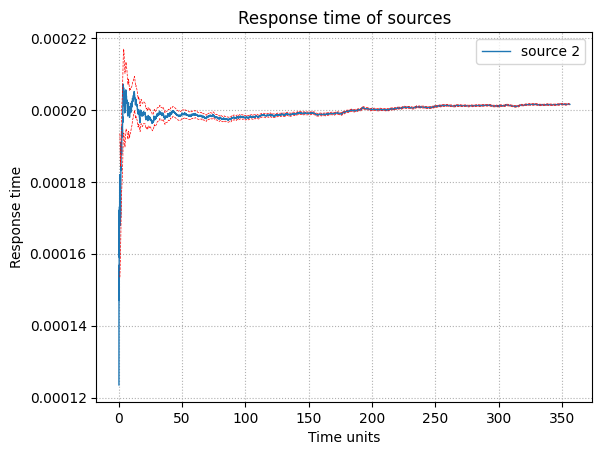

In [24]:
plotResult(2)

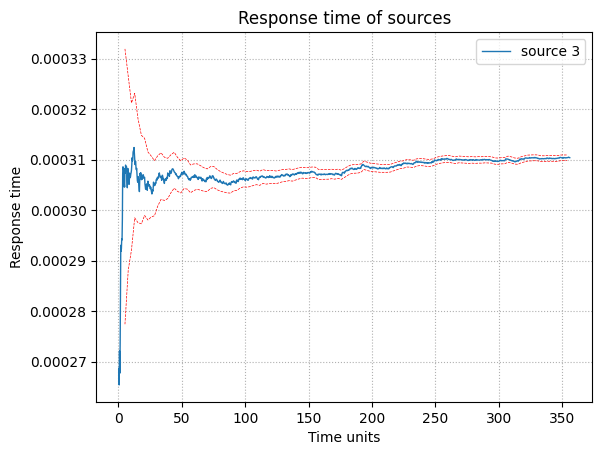

In [25]:
plotResult(3)